In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("merged_df.csv")

In [93]:
df.head()

,pincode,state,district,day,month,weekday,year,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,enro_age_0_5,enro_age_5_17,enro_age_18_greater
0,110001,delhi,new delhi,3,January,Friday,2025,0,0,191,247,0,0,0
1,110002,delhi,central delhi,3,January,Friday,2025,65,714,260,427,0,0,0
2,110003,delhi,central delhi,3,January,Friday,2025,75,571,347,411,0,0,0
3,110005,delhi,central delhi,3,January,Friday,2025,0,0,441,950,0,0,0
4,110006,delhi,north delhi,3,January,Friday,2025,0,0,901,1526,0,0,0


In [94]:
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [95]:
df.weekday.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Thursday',
       'Wednesday'], dtype=object)

In [96]:
#Feature engineering 

In [97]:
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

In [98]:
df["demo_total"] = df["demo_age_5_17"] + df["demo_age_17_"]
df["bio_total"]  = df["bio_age_5_17"]  + df["bio_age_17_"]
df["enro_total"] = df["enro_age_0_5"] + df["enro_age_5_17"] + df["enro_age_18_greater"]

In [99]:
df["total_activity"] = df["demo_total"] + df["bio_total"] + df["enro_total"]


In [100]:
df.head()

,pincode,state,district,day,month,weekday,year,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,enro_age_0_5,enro_age_5_17,enro_age_18_greater,demo_total,bio_total,enro_total,total_activity
0,110001,delhi,new delhi,3,January,Friday,2025,0,0,191,247,0,0,0,0,438,0,438
1,110002,delhi,central delhi,3,January,Friday,2025,65,714,260,427,0,0,0,779,687,0,1466
2,110003,delhi,central delhi,3,January,Friday,2025,75,571,347,411,0,0,0,646,758,0,1404
3,110005,delhi,central delhi,3,January,Friday,2025,0,0,441,950,0,0,0,0,1391,0,1391
4,110006,delhi,north delhi,3,January,Friday,2025,0,0,901,1526,0,0,0,0,2427,0,2427


In [101]:
#univariate

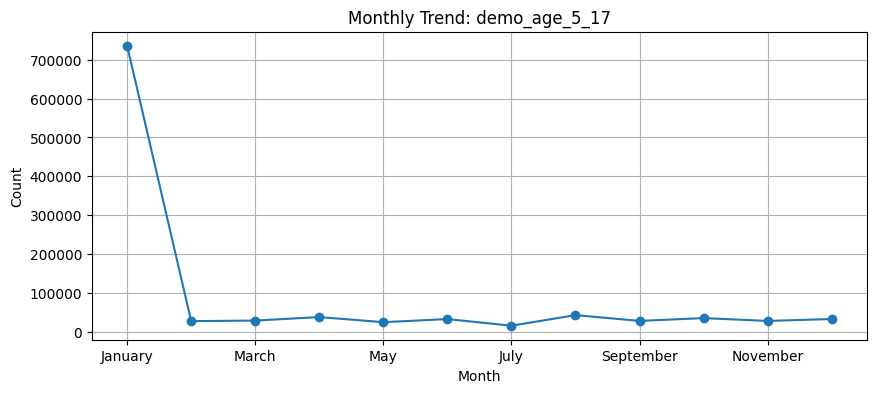

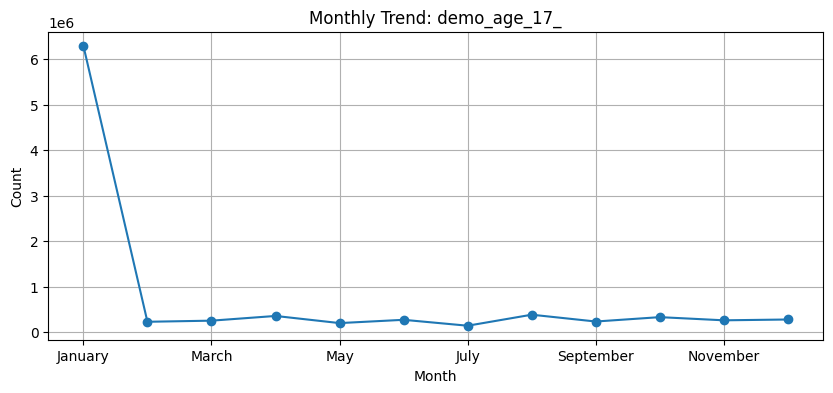

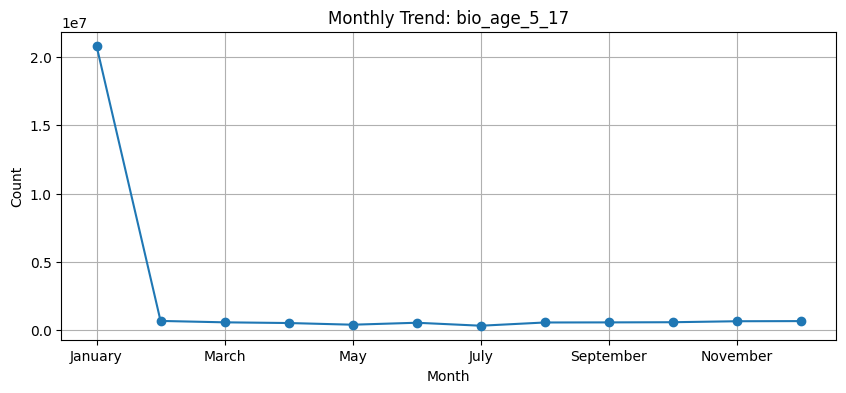

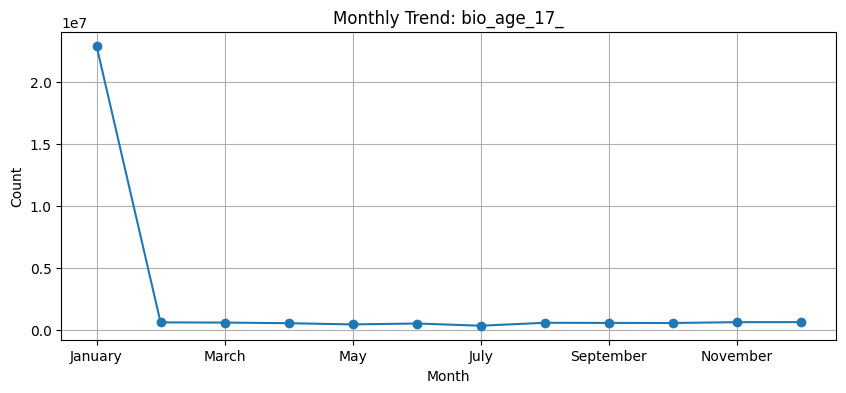

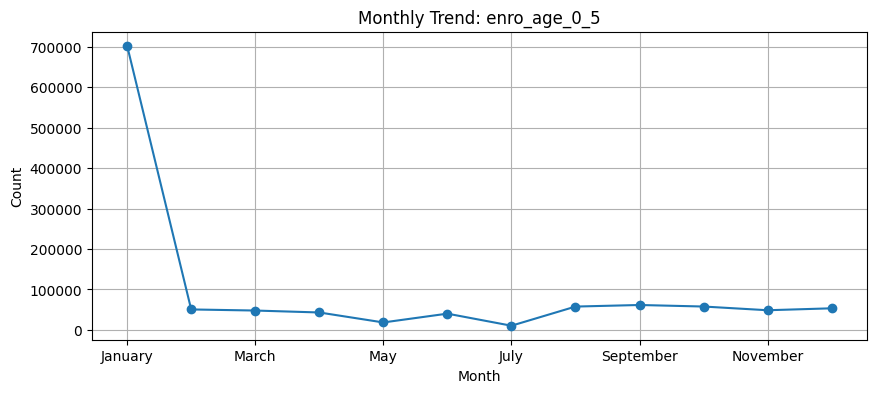

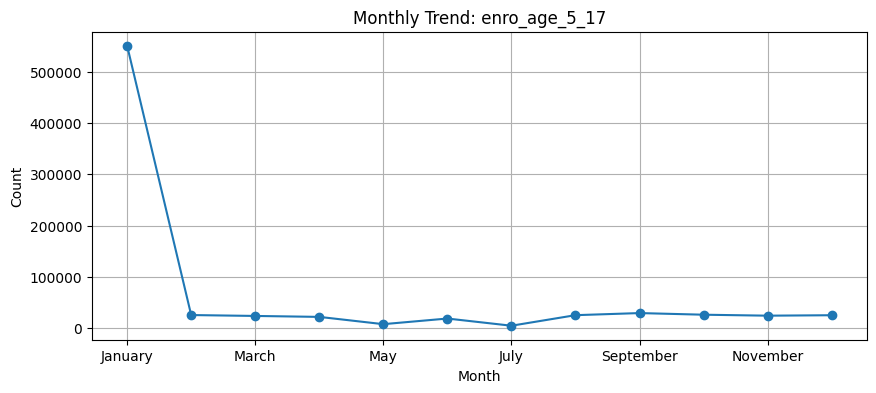

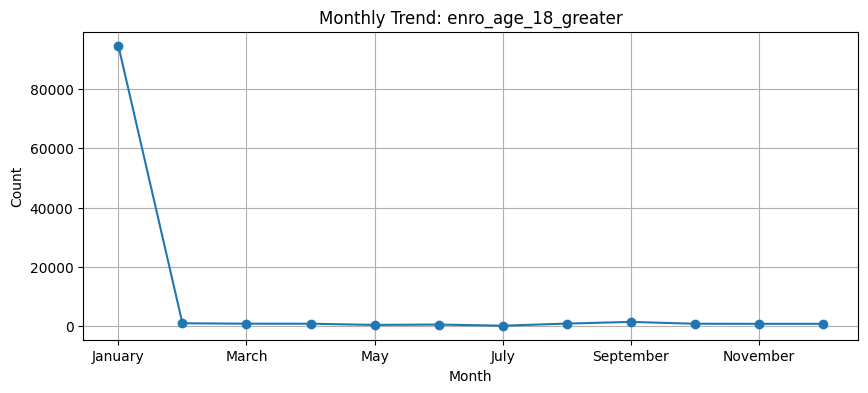

In [102]:
cols = [
    "demo_age_5_17", "demo_age_17_",
    "bio_age_5_17", "bio_age_17_",
    "enro_age_0_5", "enro_age_5_17", "enro_age_18_greater"
]

for col in cols:
    monthly_sum = df.groupby("month", observed=True)[col].sum()

    plt.figure(figsize=(10,4))
    monthly_sum.plot(kind="line", marker="o")
    plt.title(f"Monthly Trend: {col}")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


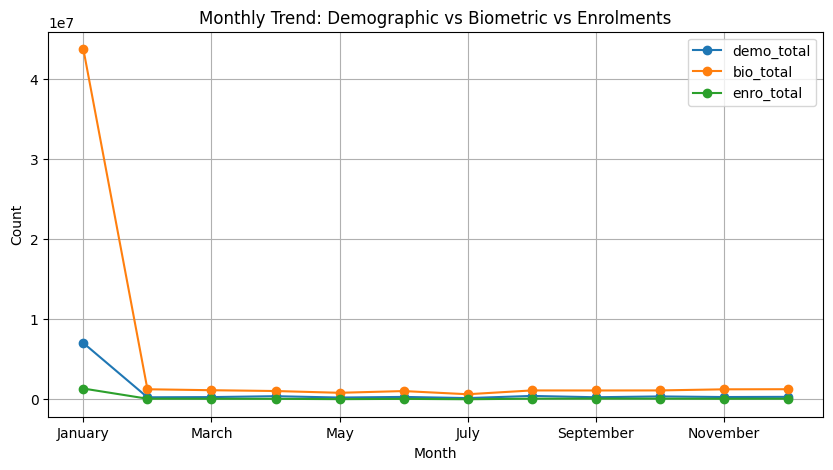

,demo_total,bio_total,enro_total,total_activity
month,,,,
January,7036348,43764009,1348645,52149002
February,255441,1259888,76602,1591931
March,281286,1140110,71987,1493383
April,393855,1039290,65349,1498494
May,223706,817842,26069,1067617
June,304022,1033946,58957,1396925
July,156757,637552,14658,808967
August,426437,1112292,83352,1622081
September,261571,1107484,91911,1460966


In [103]:
monthly_summary = df.groupby("month", observed=True)[["demo_total","bio_total","enro_total","total_activity"]].sum()
monthly_summary[["demo_total","bio_total","enro_total"]].plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Trend: Demographic vs Biometric vs Enrolments")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.show()

monthly_summary


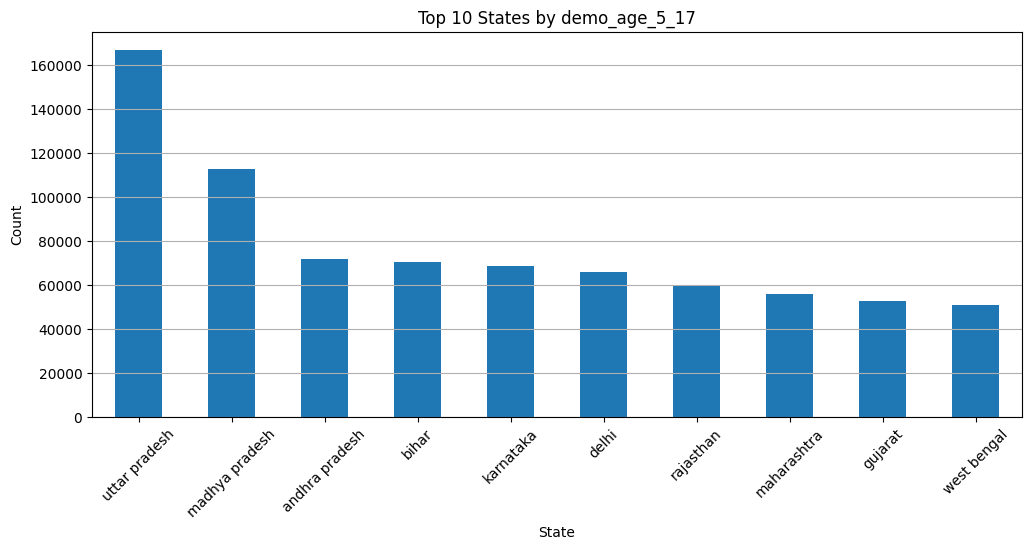

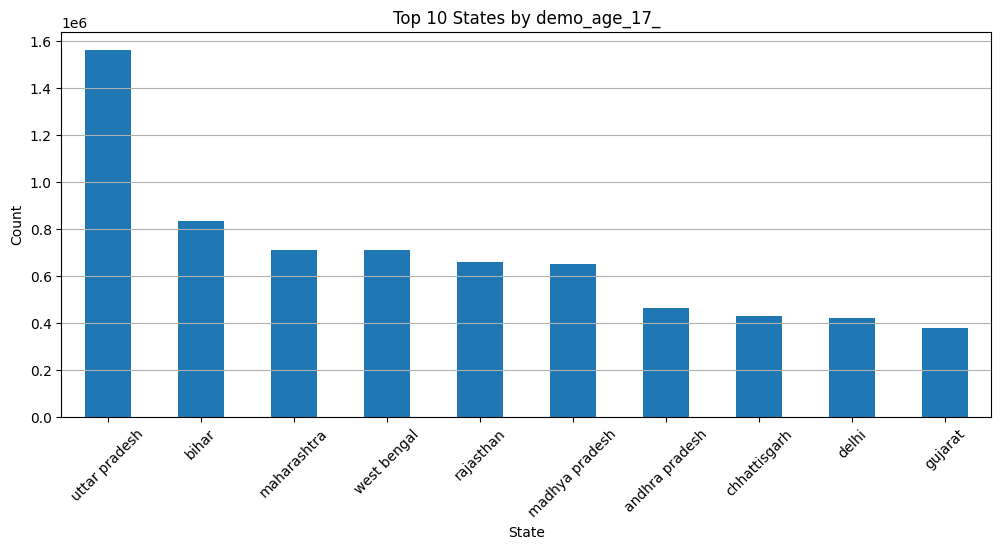

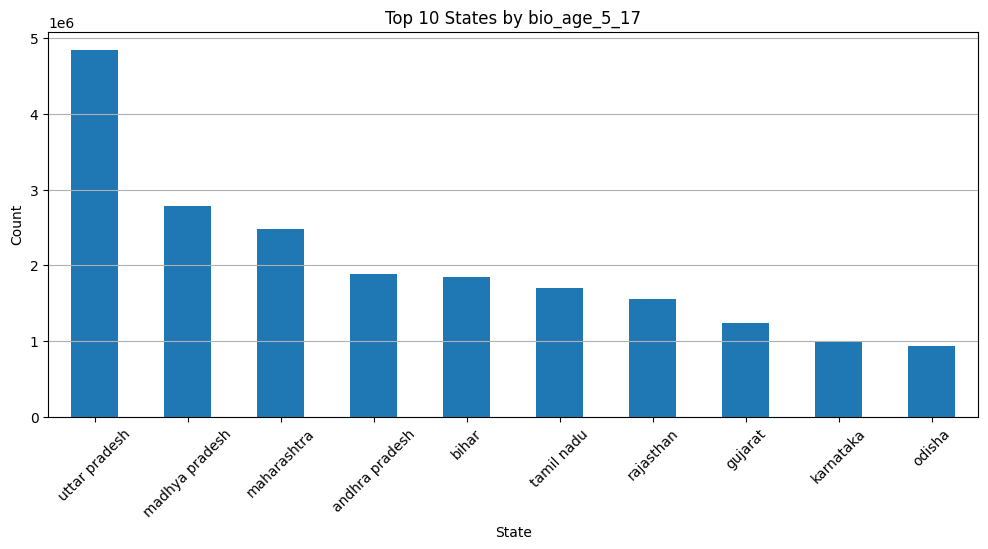

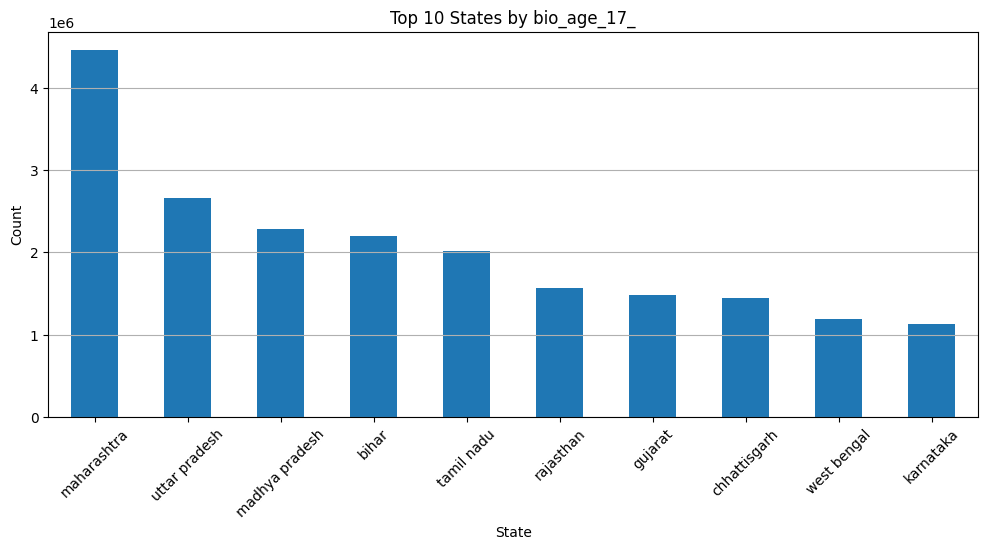

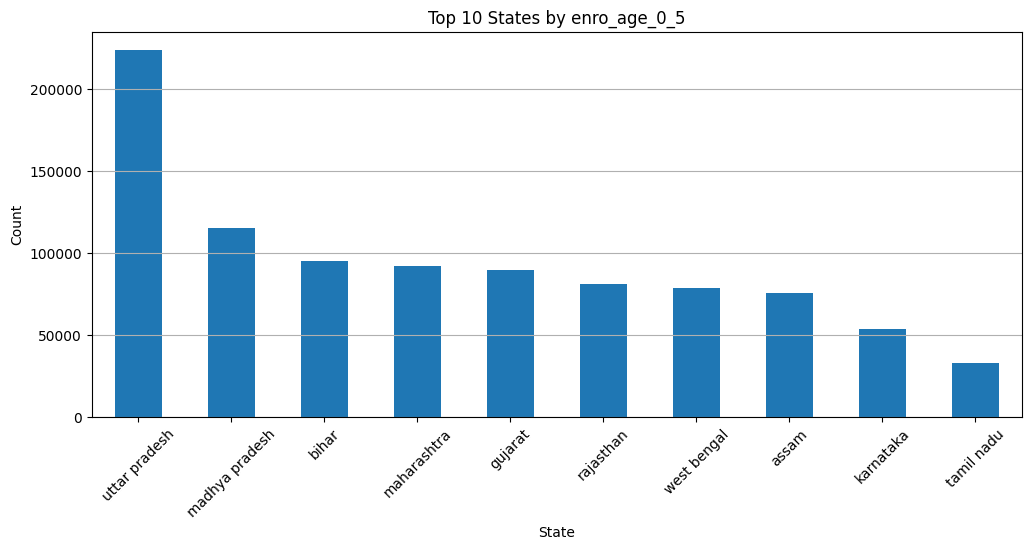

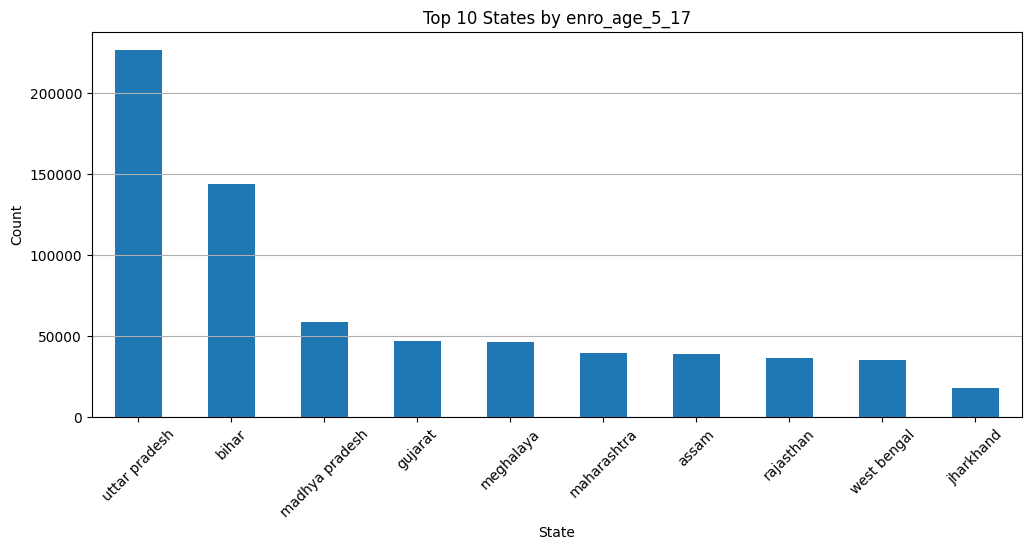

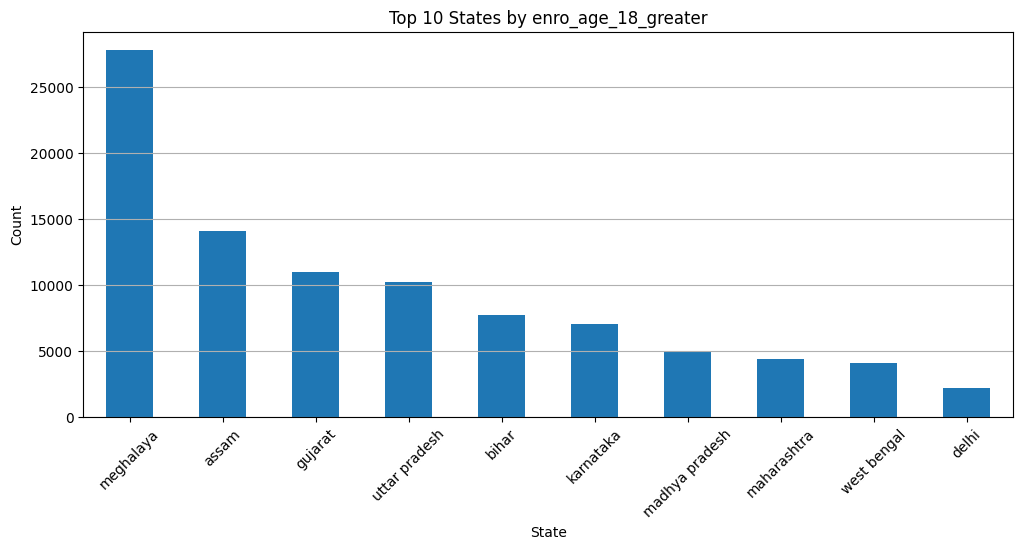

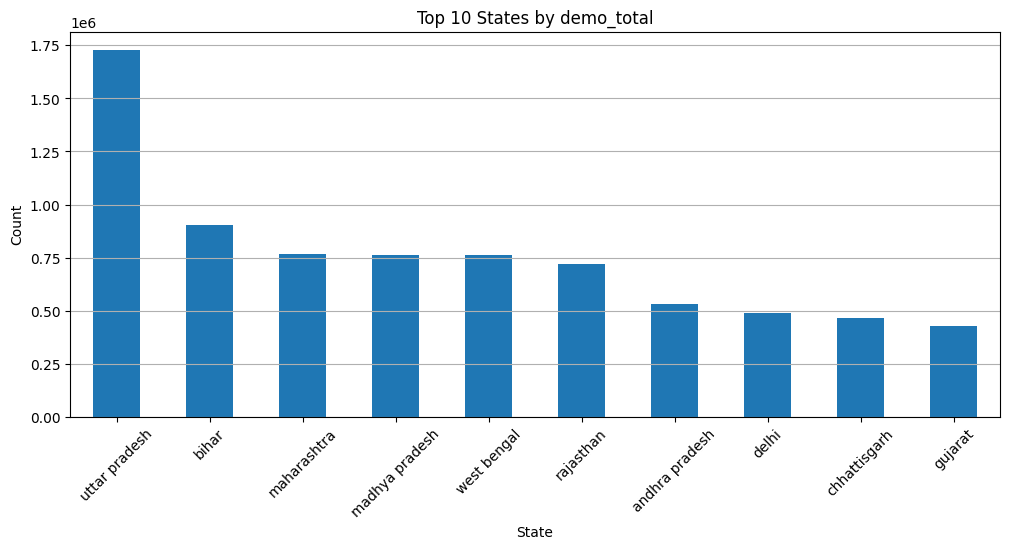

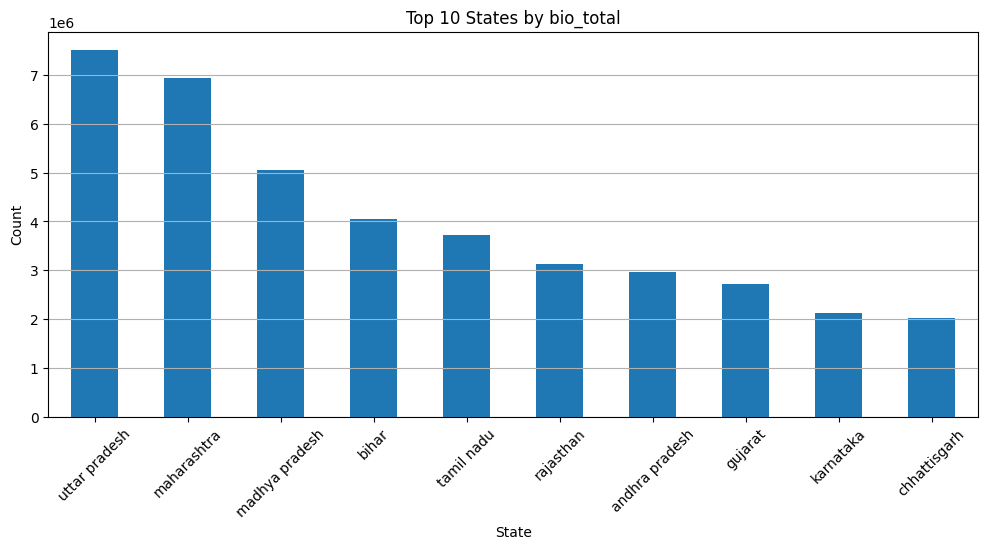

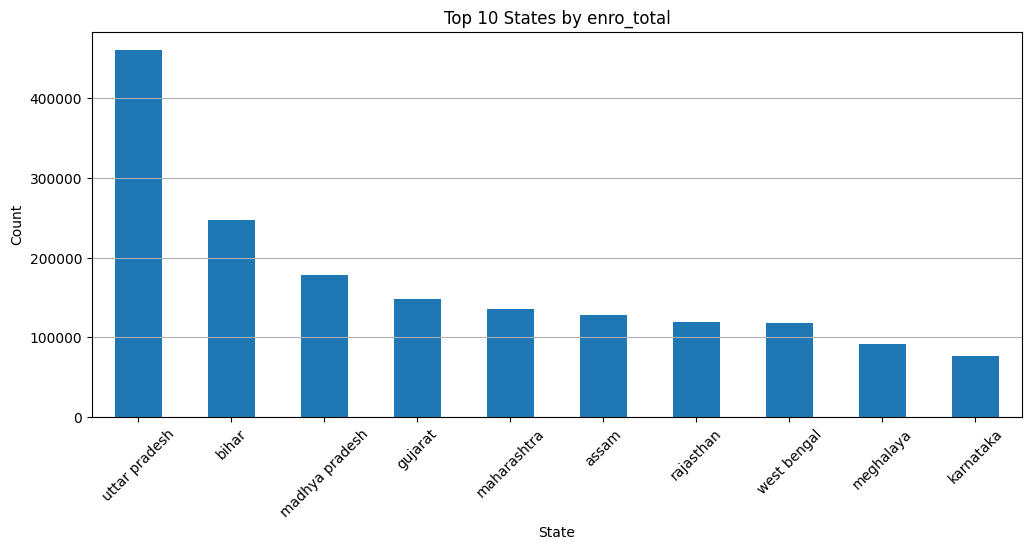

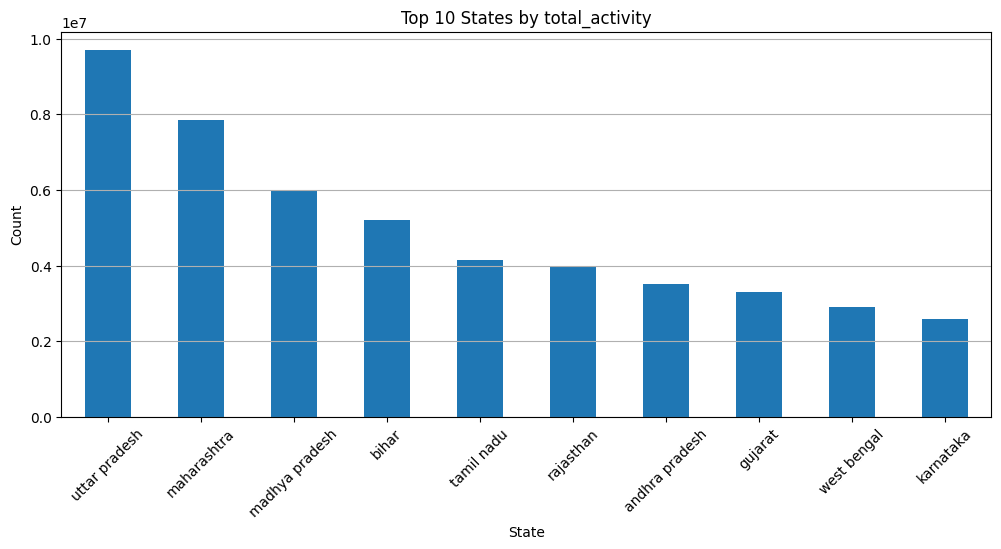

In [104]:

cols = [
    "demo_age_5_17", "demo_age_17_",
    "bio_age_5_17", "bio_age_17_",
    "enro_age_0_5", "enro_age_5_17", "enro_age_18_greater",
    "demo_total", "bio_total", "enro_total", "total_activity"
]

for col in cols:
    state_sum = df.groupby("state")[col].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12,5))
    state_sum.plot(kind="bar")
    plt.title(f"Top 10 States by {col}")
    plt.xlabel("State")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.show()


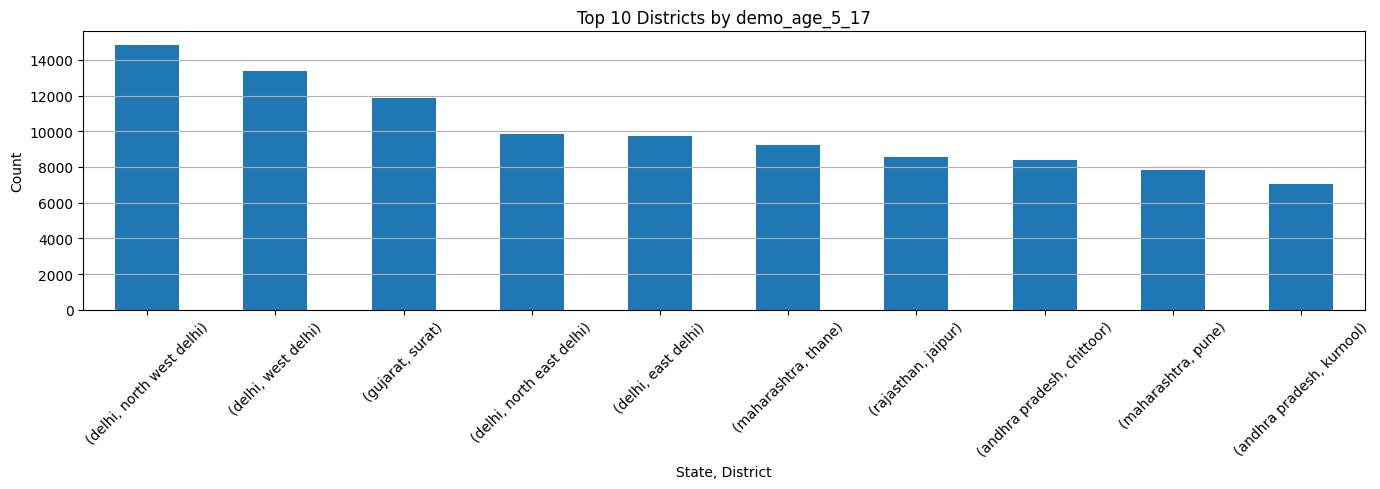

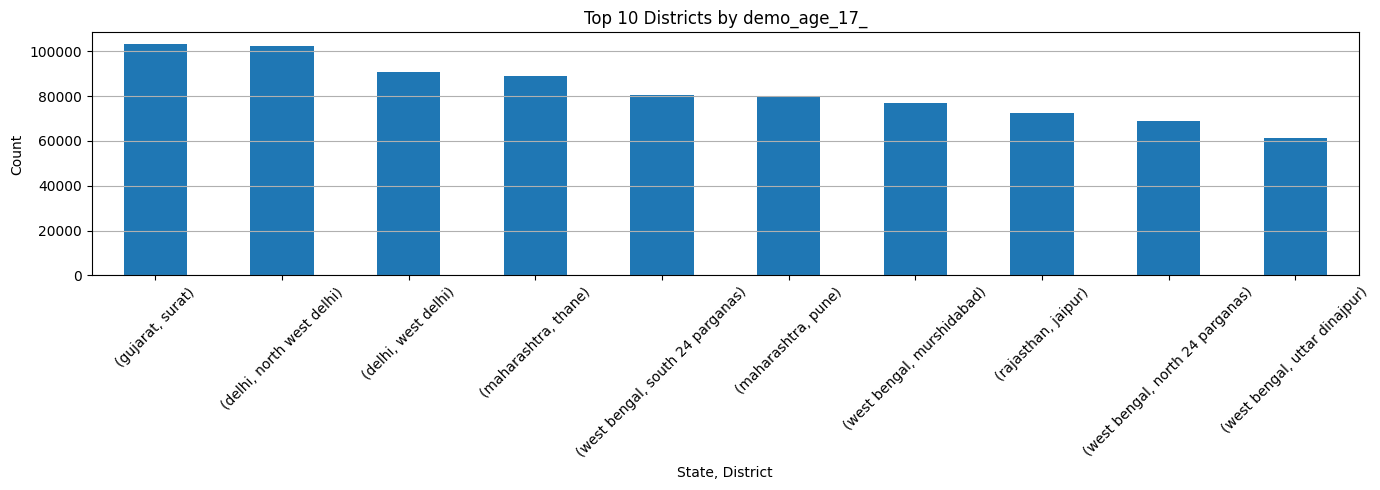

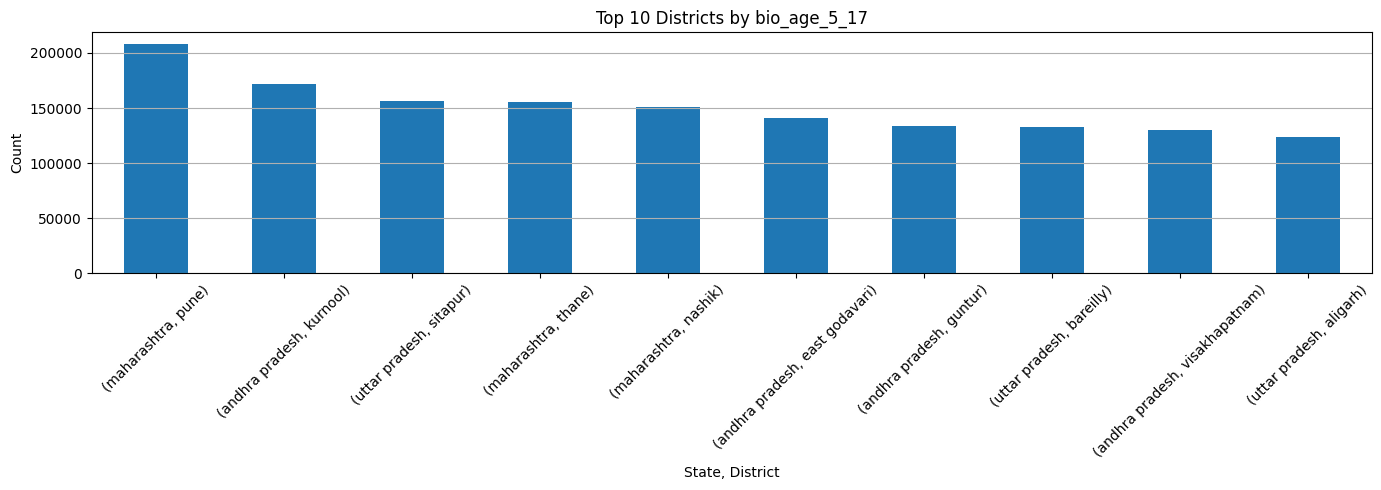

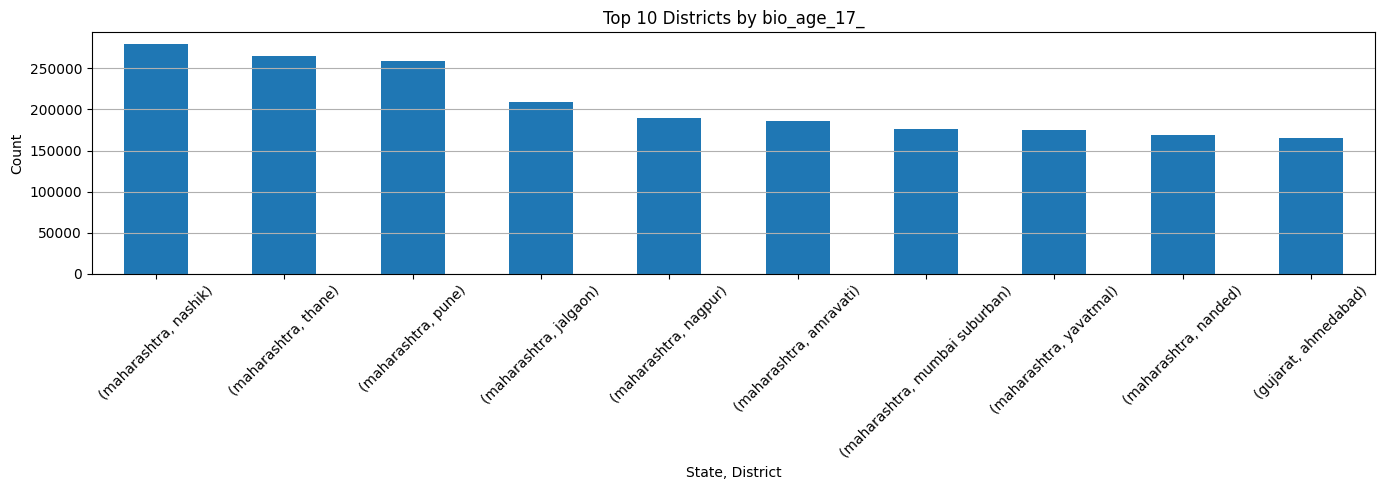

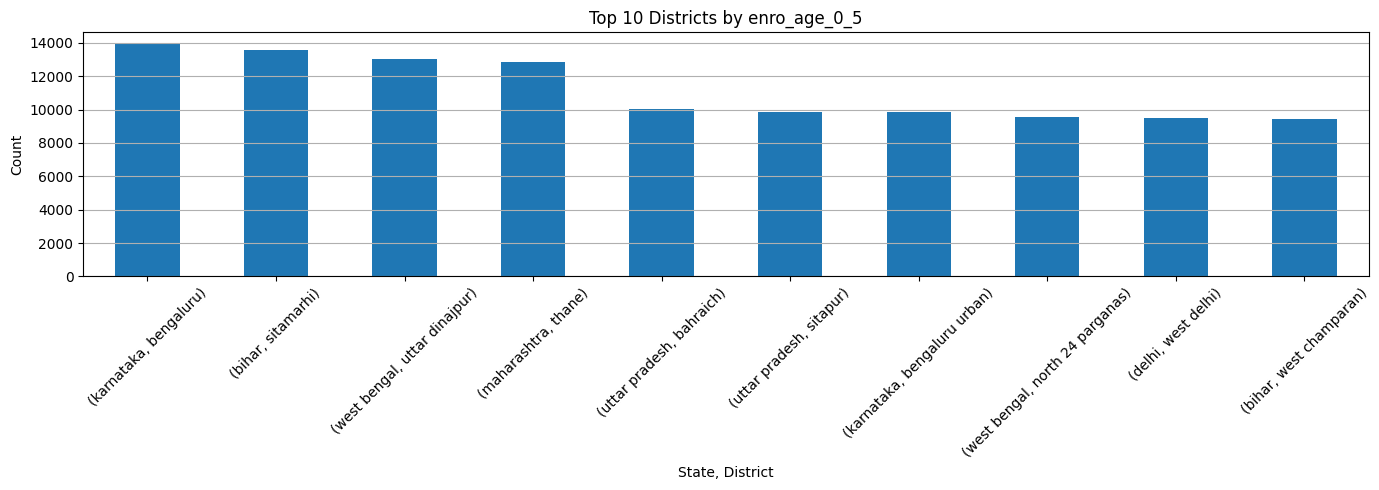

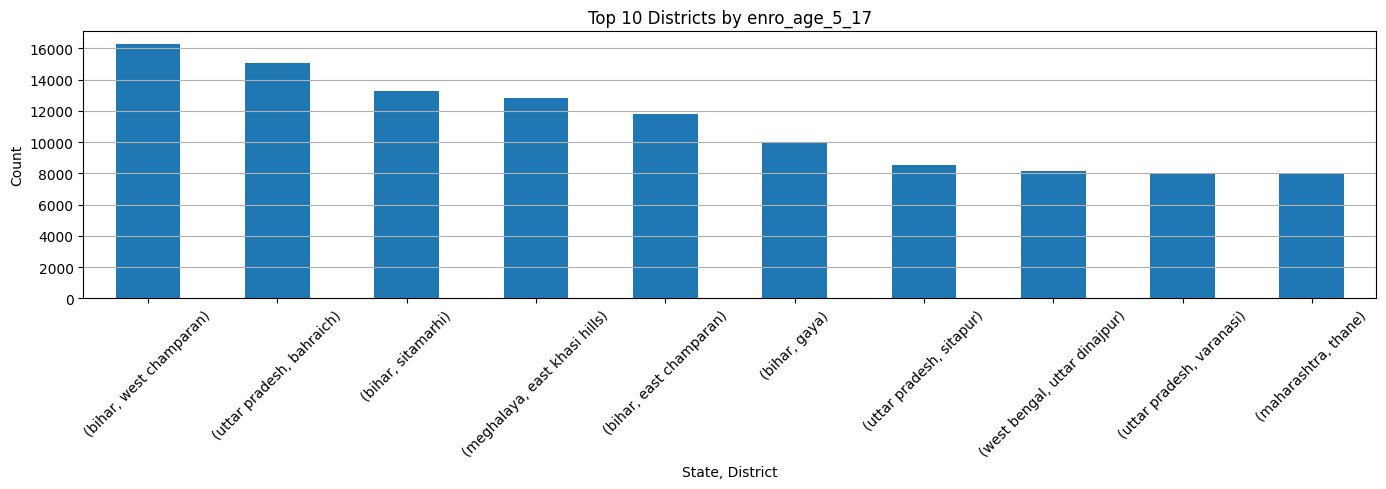

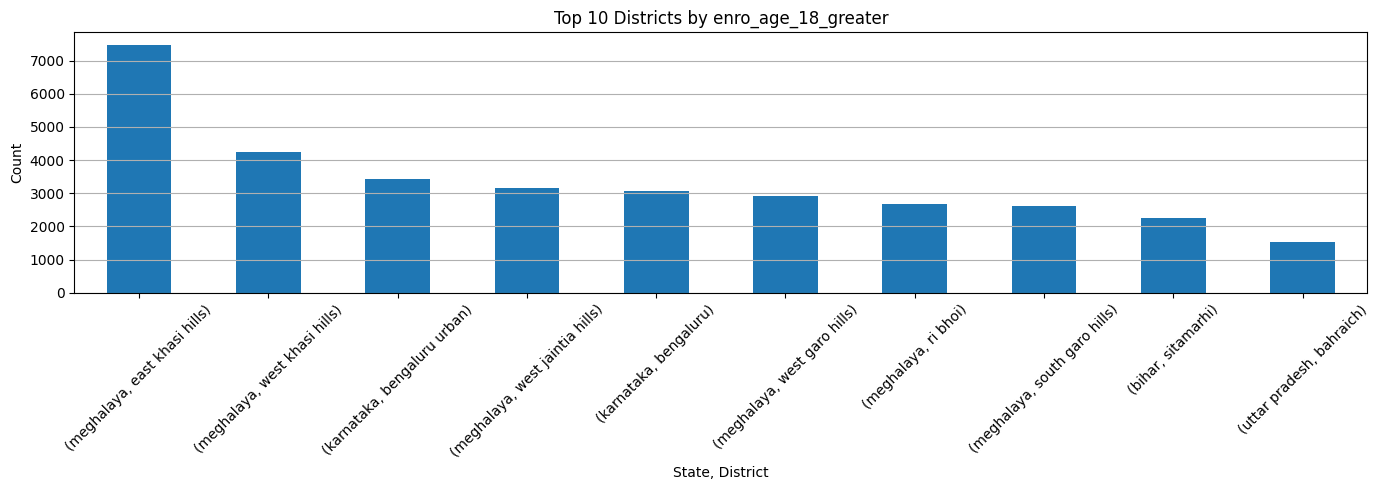

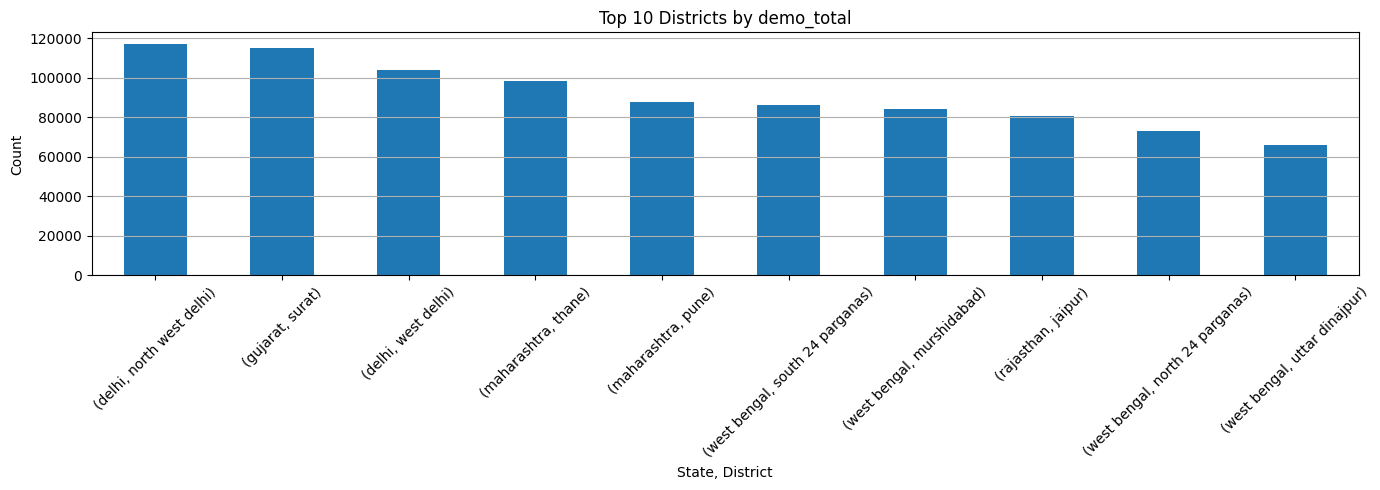

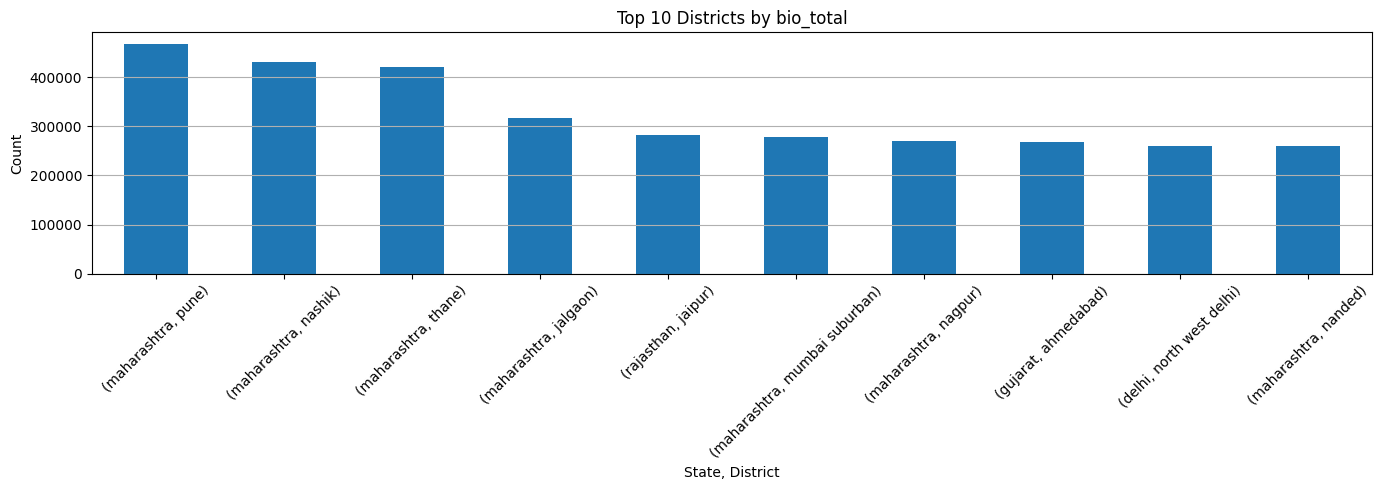

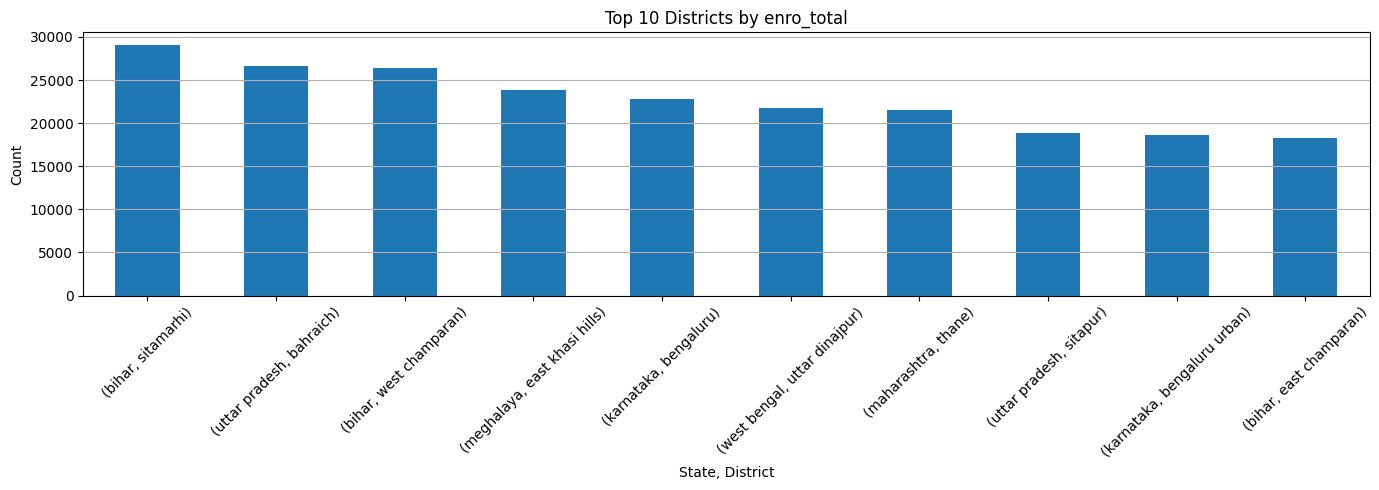

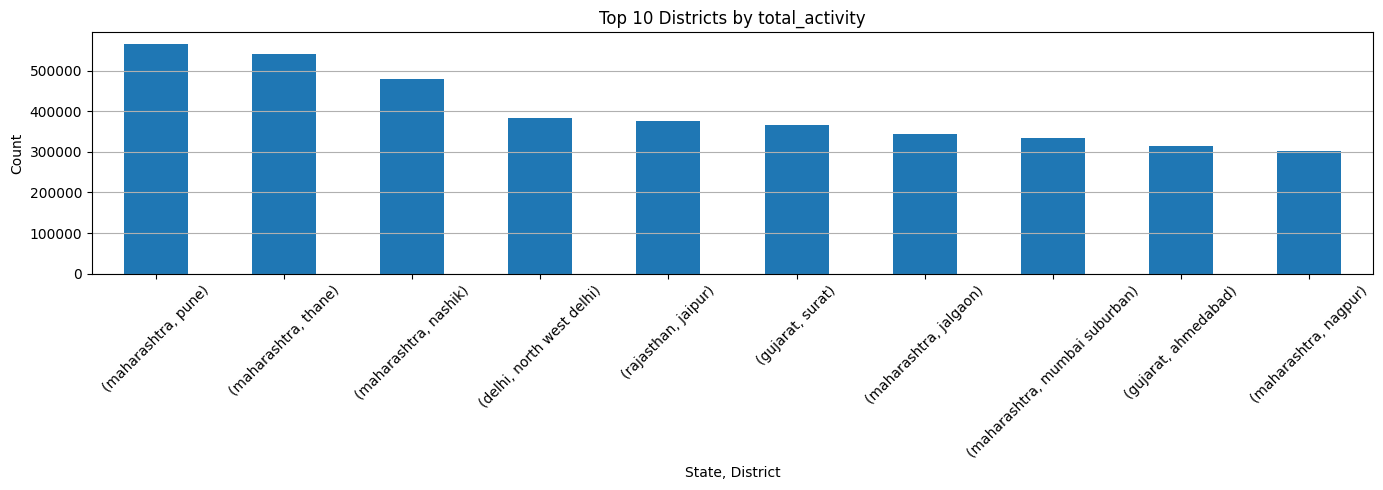

In [105]:
cols = [
    "demo_age_5_17", "demo_age_17_",
    "bio_age_5_17", "bio_age_17_",
    "enro_age_0_5", "enro_age_5_17", "enro_age_18_greater",
    "demo_total", "bio_total", "enro_total", "total_activity"
]

for col in cols:
    top_districts = (
        df.groupby(["state","district"])[col]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )

    fig, ax = plt.subplots(figsize=(14,5))
    top_districts.plot(kind="bar", ax=ax)
    ax.set_title(f"Top 10 Districts by {col}")
    ax.set_xlabel("State, District")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(axis="y")
    plt.tight_layout()
    plt.show()
    plt.close(fig)

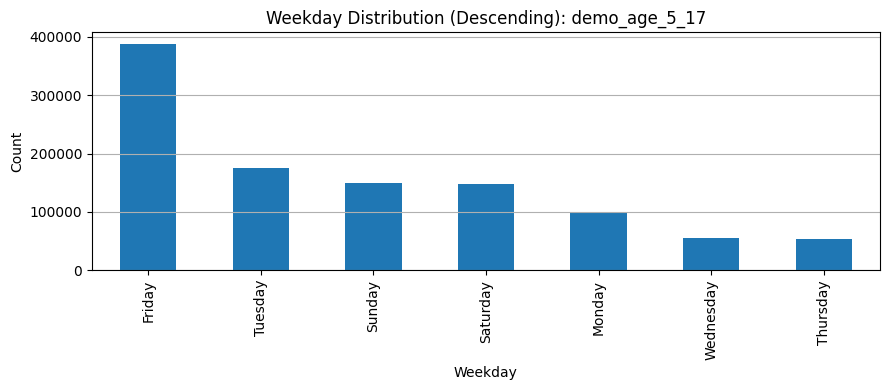

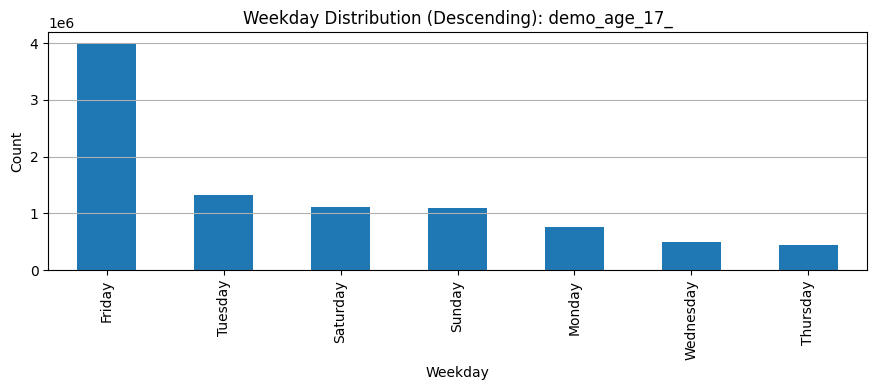

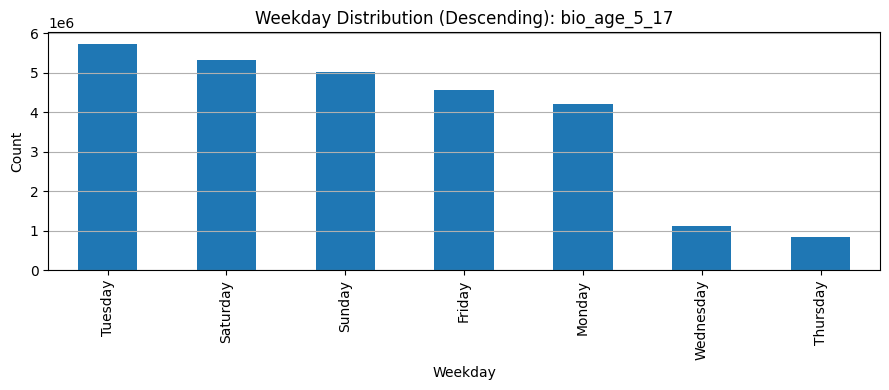

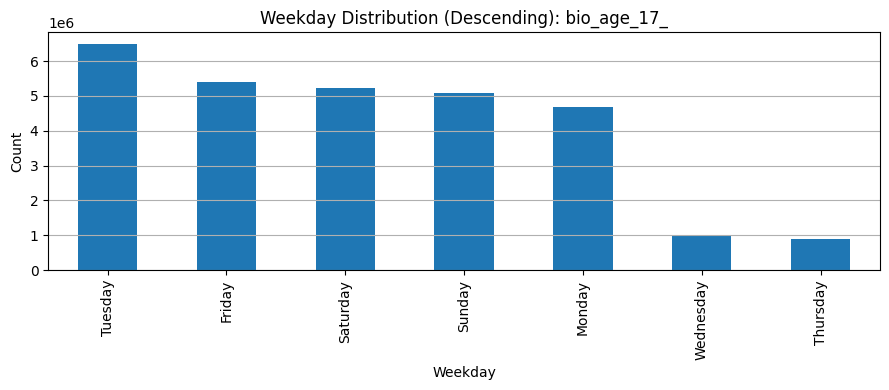

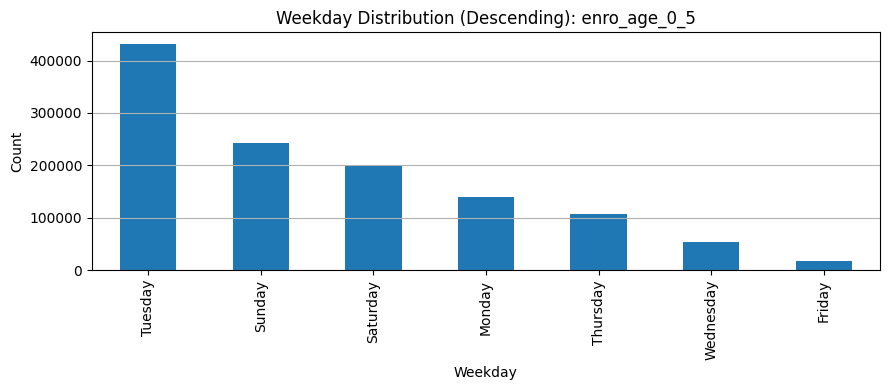

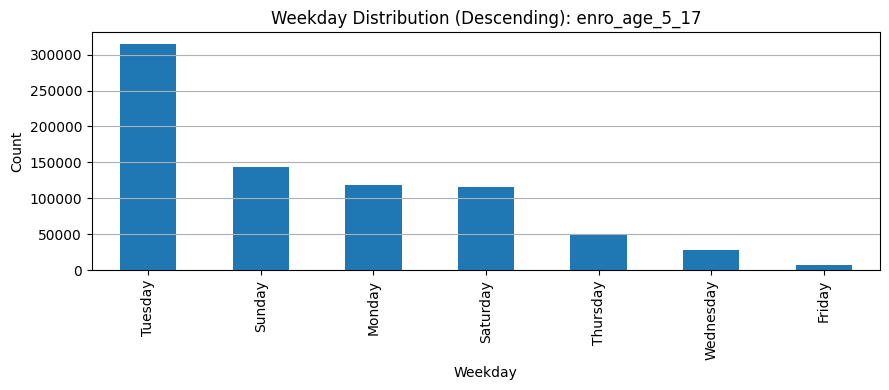

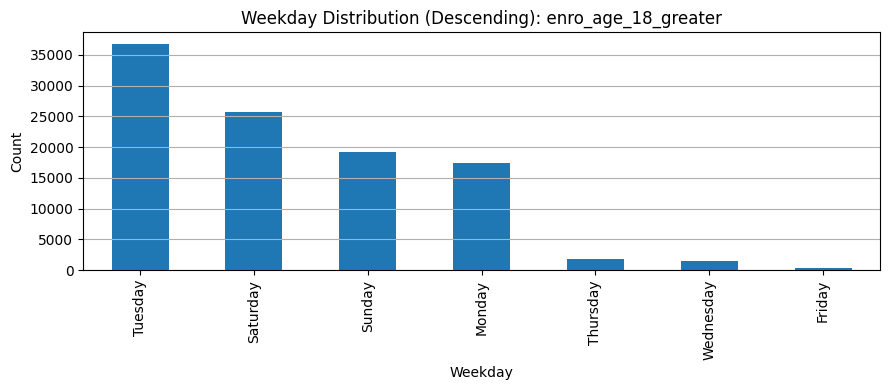

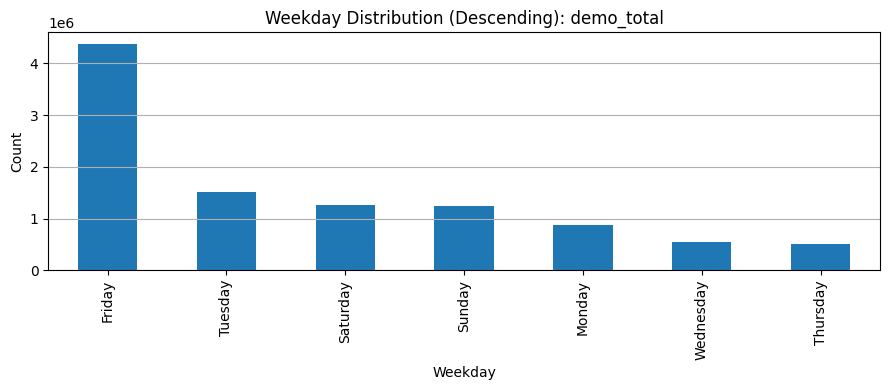

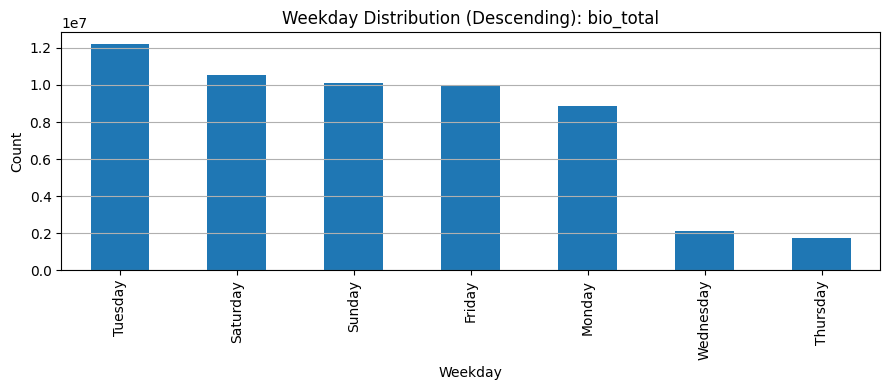

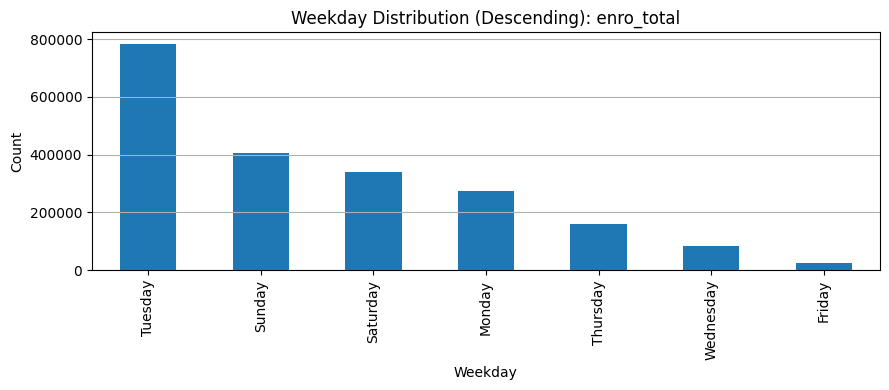

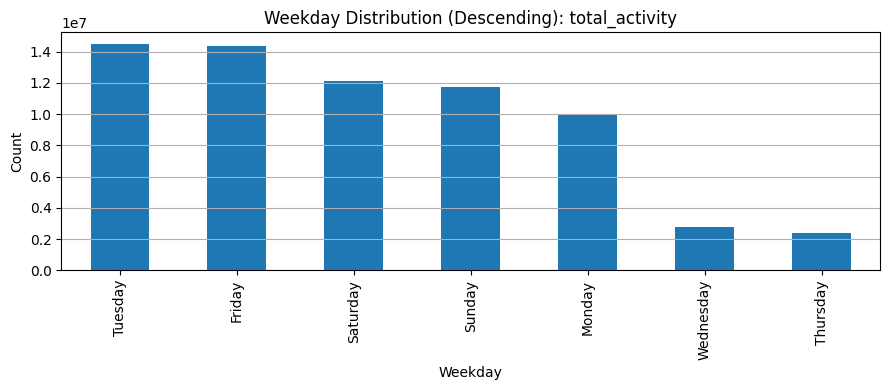

In [106]:
for col in cols:
    weekday_sum = df.groupby("weekday", observed=True)[col].sum()
    weekday_sum = weekday_sum.sort_values(ascending=False)
    fig, ax = plt.subplots(figsize=(9,4))
    weekday_sum.plot(kind="bar", ax=ax)
    ax.set_title(f"Weekday Distribution (Descending): {col}")
    ax.set_xlabel("Weekday")
    ax.set_ylabel("Count")
    ax.grid(axis="y")
    plt.tight_layout()
    plt.show()
    plt.close(fig)

                                      ADHAAR SERVICE STRESS INDEX 

In [107]:
df["Stress_Index"] = (2*df["bio_total"]) + (1*df["demo_total"]) + (0.5*df["enro_total"])

district_stress = (
    df.groupby(["state","district"])["Stress_Index"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

district_stress


state           district        
maharashtra     pune                1028460.0
                thane                951149.0
                nashik               905486.5
                jalgaon              657859.0
rajasthan       jaipur               651395.5
delhi           north west delhi     641203.5
maharashtra     mumbai suburban      607798.5
gujarat         surat                595361.5
                ahmedabad            578849.0
maharashtra     nagpur               571977.0
                solapur              547496.0
                nanded               544590.0
andhra pradesh  kurnool              537768.0
maharashtra     amravati             526291.0
                aurangabad           515052.5
Name: Stress_Index, dtype: float64

Insight->Top stress districts require more operators/kits to reduce wait time

                                          ANOMALY DETECTION 

In [108]:
df1 = df.copy()

districts = (
    df1.groupby(["state","district","month","day"])["total_activity"]
    .sum()
    .reset_index()
)

districts["mean"] = districts.groupby(["state","district"])["total_activity"].transform("mean")
districts["std"]  = districts.groupby(["state","district"])["total_activity"].transform("std")
districts["zscore"] = (districts["total_activity"] - districts["mean"]) / (districts["std"] + 1e-9)

anomalies = districts[districts["zscore"] > 5].sort_values("zscore", ascending=False)

anomalies.head(20)


C:\Users\arsha\AppData\Local\Temp\ipykernel_6968\806221055.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(["state","district","month","day"])["total_activity"]


,state,district,month,day,total_activity,mean,std,zscore
1747204,manipur,imphal west,January,7,19579,497.541667,2048.961076,9.312748
1792132,manipur,thoubal,January,7,17414,459.385417,1834.317893,9.243008
1947264,mizoram,serchhip,January,3,3720,66.822917,395.267984,9.242279
1747108,manipur,imphal east,January,7,19376,511.989583,2053.996641,9.184051
1751332,manipur,kakching,January,7,4540,126.875000,488.052052,9.042324
1881984,mizoram,aizawl,January,3,16705,352.854167,1824.654845,8.961775
528483,chhattisgarh,khairagarh chhuikhadan gandai,January,6,5842,135.041667,646.099404,8.832942
1023651,himachal pradesh,lahul & spiti,January,6,204,7.468750,22.422241,8.765014
1728964,manipur,bishnupur,January,7,10662,326.427083,1189.555253,8.688603
2029636,nagaland,shamator,January,7,67,1.875000,7.499123,8.684349


UPDATE-HEAVY vs ENROLMENT-HEAVY DISTRICT SEGMENTATION

In [109]:
districts_seg = df.groupby(["state","district"])[["demo_total","bio_total","enro_total","total_activity"]].sum()

districts_seg["update_ratio"] = (districts_seg["demo_total"] + districts_seg["bio_total"]) / (districts_seg["total_activity"] + 1)

def label(x):
    if x > 0.85:
        return "Update-heavy"
    elif x < 0.60:
        return "Enrolment-heavy"
    else:
        return "Balanced"

districts_seg["district_type"] = districts_seg["update_ratio"].apply(label)

districts_seg["district_type"].value_counts()


district_type
Update-heavy       839
Balanced            21
Enrolment-heavy     10
Name: count, dtype: int64

                                            WEEKDAY LOAD OPTIMISATION

In [110]:
weekday_state = (
    df.groupby(["state","weekday"])["total_activity"]
    .sum()
    .reset_index()
)

best_day = weekday_state.loc[weekday_state.groupby("state")["total_activity"].idxmax()]
best_day.sort_values("total_activity", ascending=False).head(15)


,state,weekday,total_activity
236,uttar pradesh,Tuesday,2211028
145,maharashtra,Tuesday,1808046
138,madhya pradesh,Tuesday,1402500
28,bihar,Friday,1335893
210,tamil nadu,Friday,1017019
201,rajasthan,Tuesday,990562
9,andhra pradesh,Saturday,764800
75,gujarat,Tuesday,751198
250,west bengal,Tuesday,668058
98,jharkhand,Friday,573785


                                 PINCODE CONCENTRATION (80/20 Rule)

In [111]:
pin = df.groupby("pincode")["total_activity"].sum().sort_values(ascending=False)

share = (pin.cumsum() / pin.sum())
top20_pct_pins = (share <= 0.80).sum()

print("Pincodes needed for 80% of activity:", top20_pct_pins)
print("Total pincodes:", pin.shape[0])

Pincodes needed for 80% of activity: 7627
Total pincodes: 19447


                                    BIOMETRIC VS DEMOGRAPHIC MAP

In [112]:
district_map = df.groupby(["state","district"])[["bio_total","demo_total"]].sum()
district_map["bio_share"] = district_map["bio_total"] / (district_map["bio_total"] + district_map["demo_total"] + 1)

district_map.sort_values("bio_share", ascending=False).head(15)


bio_total  \
state                                    district                                
nagaland                                 longleng                         1876   
                                         kohima                          10059   
chhattisgarh                             dakshin bastar dantewada        32184   
himachal pradesh                         lahul & spiti                     691   
andaman and nicobar islands              nicobar                          1517   
mizoram                                  saitual                          3736   
dadra and nagar haveli and daman and diu dadra and nagar haveli          22707   
chhattisgarh                             dantewada                        4902   
nagaland                                 phek                             8002   
lakshadweep                              lakshadweep                      3753   
punjab                                   nawanshahr                       6935   
                                         shaheed bhagat singh nagar      22759   
maharashtra                              bid                             28717   
nagaland                                 dimapur                         18047   
karnataka                                chikmagalur                       650   

                                                                     demo_total  \
state                                    district                                 
nagaland                                 longleng                            19   
                                         kohima                             209   
chhattisgarh                             dakshin bastar dantewada           705   
himachal pradesh                         lahul & spiti                       15   
andaman and nicobar islands              nicobar                             39   
mizoram                                  saitual                             98   
dadra and nagar haveli and daman and diu dadra and nagar haveli             614   
chhattisgarh                             dantewada                          133   
nagaland                                 phek                               228   
lakshadweep                              lakshadweep                        116   
punjab                                   nawanshahr                         217   
                                         shaheed bhagat singh nagar         720   
maharashtra                              bid                                932   
nagaland                                 dimapur                            592   
karnataka                                chikmagalur                         21   

                                                                     bio_share  
state                                    district                               
nagaland                                 longleng                     0.989451  
                                         kohima                       0.979550  
chhattisgarh                             dakshin bastar dantewada     0.978535  
himachal pradesh                         lahul & spiti                0.977369  
andaman and nicobar islands              nicobar                      0.974310  
mizoram                                  saitual                      0.974185  
dadra and nagar haveli and daman and diu dadra and nagar haveli       0.973630  
chhattisgarh                             dantewada                    0.973392  
nagaland                                 phek                         0.972178  
lakshadweep                              lakshadweep                  0.969767  
punjab                                   nawanshahr                   0.969523  
                                         shaheed bhagat singh nagar   0.969293  
maharashtra                              bid                          0.968533  
nagaland                                 dimapu

                              Peak Month for each State (Seasonality detection)

In [113]:
state_month = df.groupby(["state","month"])["total_activity"].sum().reset_index()
peak_month = state_month.loc[state_month.groupby("state")["total_activity"].idxmax()]

peak_month.sort_values("total_activity", ascending=False).head(15)


C:\Users\arsha\AppData\Local\Temp\ipykernel_6968\70671448.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_month = df.groupby(["state","month"])["total_activity"].sum().reset_index()


,state,month,total_activity
396,uttar pradesh,January,7391974
240,maharashtra,January,5680900
228,madhya pradesh,January,4985212
48,bihar,January,3923944
360,tamil nadu,January,3088989
336,rajasthan,January,2909077
12,andhra pradesh,January,2839115
120,gujarat,January,2712862
180,karnataka,January,2038609
420,west bengal,January,2004380


                                     States with Low Enrolments but High Updates

In [114]:
df["updates_total"] = df["demo_total"] + df["bio_total"]


In [115]:
state_summary = df.groupby("state")[["updates_total", "enro_total"]].sum()

state_summary["update_enrol_ratio"] = state_summary["updates_total"] / (state_summary["enro_total"] + 1)

state_summary = state_summary.sort_values("update_enrol_ratio", ascending=False)

state_summary.head(15)


,updates_total,enro_total,update_enrol_ratio
state,,,
chandigarh,76710,440,173.945578
andaman and nicobar islands,17449,120,144.206612
himachal pradesh,330907,2505,132.045890
goa,59704,454,131.217582
kerala,1410372,10785,130.759503
lakshadweep,3869,29,128.966667
andhra pradesh,3497347,27222,128.470301
tamil nadu,4119494,39901,103.240289
jammu and kashmir,690563,7195,95.964842


In [116]:
top_states = state_summary.head(5).index  

for s in top_states:
    print("\n===============================")
    print("STATE:", s)
    print("===============================")
    pincode_summary = df[df["state"] == s].groupby("pincode")[["updates_total","enro_total"]].sum()
    pincode_summary["ratio"] = pincode_summary["updates_total"] / (pincode_summary["enro_total"] + 1)
    pincode_summary = pincode_summary.sort_values("ratio", ascending=False).head(10)
    print(pincode_summary)



STATE: chandigarh
         updates_total  enro_total       ratio
pincode                                       
160015            2080           4  416.000000
160102            6315          20  300.714286
160022            2388           7  298.500000
160101           14198          49  283.960000
160011             750           2  250.000000
160002            5962          26  220.814815
160047           15099          68  218.826087
160019            4803          21  218.318182
160023            1055           4  211.000000
160020            1382           7  172.750000

STATE: andaman and nicobar islands
         updates_total  enro_total       ratio
pincode                                       
744101            2515           5  419.166667
744103            1886           6  269.428571
744210             258           0  258.000000
744105            2130           8  236.666667
744302             229           0  229.000000
744303             592           2  197.333333
74420

                                        Early Warning Spike Detection

Early Warning Alerts: Unusual Aadhaar Activity Spikes

In [117]:
df["demo_total"] = df["demo_age_5_17"] + df["demo_age_17_"]
df["bio_total"]  = df["bio_age_5_17"]  + df["bio_age_17_"]
df["enro_total"] = df["enro_age_0_5"] + df["enro_age_5_17"] + df["enro_age_18_greater"]

df["updates_total"] = df["demo_total"] + df["bio_total"]
df["total_activity"] = df["updates_total"] + df["enro_total"]

In [118]:
x = df["total_activity"]
mean_val = x.mean()
std_val = x.std()
df["zscore"] = (x - mean_val) / (std_val + 1e-9)
anomalies = df[df["zscore"] > 5].sort_values("zscore", ascending=False)
anomalies[["year","month","day","state","district","pincode","total_activity","zscore"]].head(20)

,year,month,day,state,district,pincode,total_activity,zscore
18321,2025,January,4,delhi,north east delhi,110094,30220,81.781090
75104,2025,January,7,uttar pradesh,moradabad,244001,30000,81.183871
18288,2025,January,4,delhi,west delhi,110059,29767,80.551362
18313,2025,January,4,delhi,north west delhi,110086,25876,69.988737
56,2025,January,3,delhi,west delhi,110059,23804,64.364024
75952,2025,January,7,uttar pradesh,firozabad,283203,23716,64.125136
74132,2025,January,7,uttar pradesh,aligarh,202001,23658,63.967688
75259,2025,January,7,uttar pradesh,saharanpur,247001,22050,59.602563
72718,2025,January,7,delhi,north east delhi,110094,21805,58.937478
38708,2025,January,5,uttar pradesh,moradabad,244001,21703,58.660586


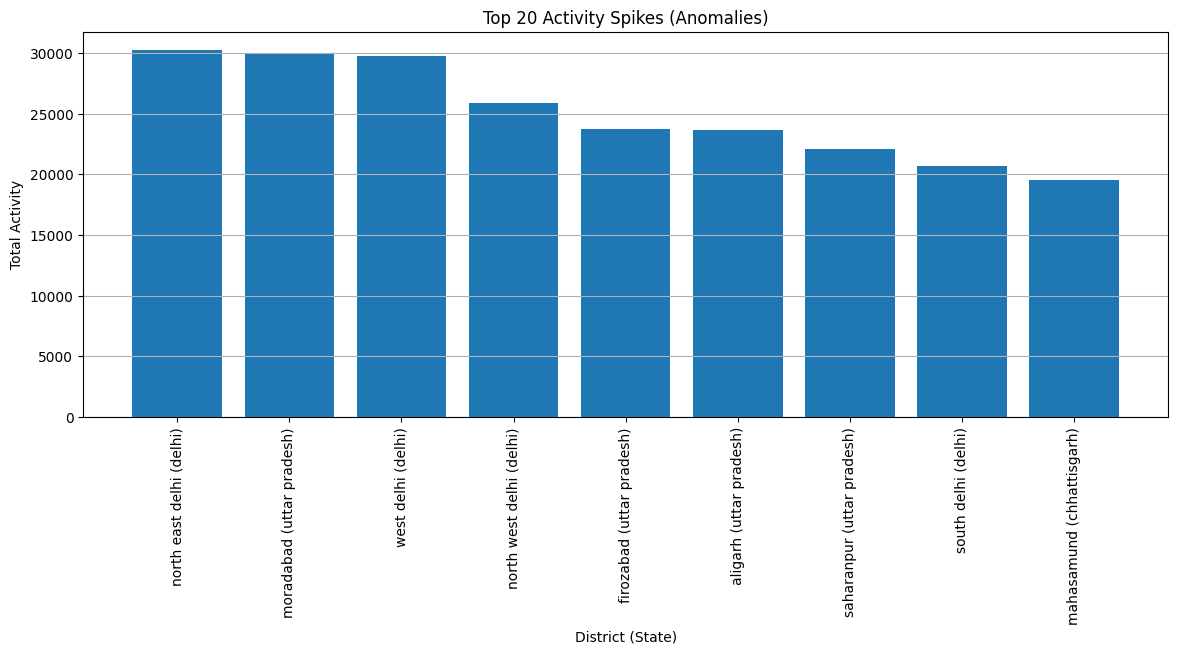

In [119]:
top_anom = anomalies.head(20).copy()
top_anom["location"] = top_anom["district"] + " (" + top_anom["state"] + ")"

plt.figure(figsize=(14,5))
plt.bar(top_anom["location"], top_anom["total_activity"])
plt.title("Top 20 Activity Spikes (Anomalies)")
plt.xlabel("District (State)")
plt.ylabel("Total Activity")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()


                        District Demand Stability: Predictable vs Volatile Regions

In [120]:
districts = (
    df.groupby(["state","district","month","day"])["total_activity"]
    .sum()
    .reset_index()
)

stability = districts.groupby(["state","district"])["total_activity"].agg(["mean","std"]).reset_index()
stability["volatility_score"] = stability["std"] / (stability["mean"] + 1e-9)

top_volatile = stability.sort_values("volatility_score", ascending=False).head(15)
top_volatile


C:\Users\arsha\AppData\Local\Temp\ipykernel_6968\568056936.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["state","district","month","day"])["total_activity"]


,state,district,mean,std,volatility_score
20284,mizoram,serchhip,66.822917,395.267984,5.915156
30107,west bengal,haora,0.052083,0.303308,5.823509
20075,mizoram,mamit,131.166667,723.824370,5.518356
20259,mizoram,saiha,74.937500,413.253250,5.514639
19735,mizoram,champhai,183.520833,994.112055,5.416889
20260,mizoram,saitual,40.010417,214.210447,5.353867
19604,mizoram,aizawl,352.854167,1824.654845,5.171130
20010,mizoram,kolasib,114.354167,575.372428,5.031495
5505,chhattisgarh,khairagarh chhuikhadan gandai,135.041667,646.099404,4.784445
20053,mizoram,lunglei,156.989583,742.368181,4.728773


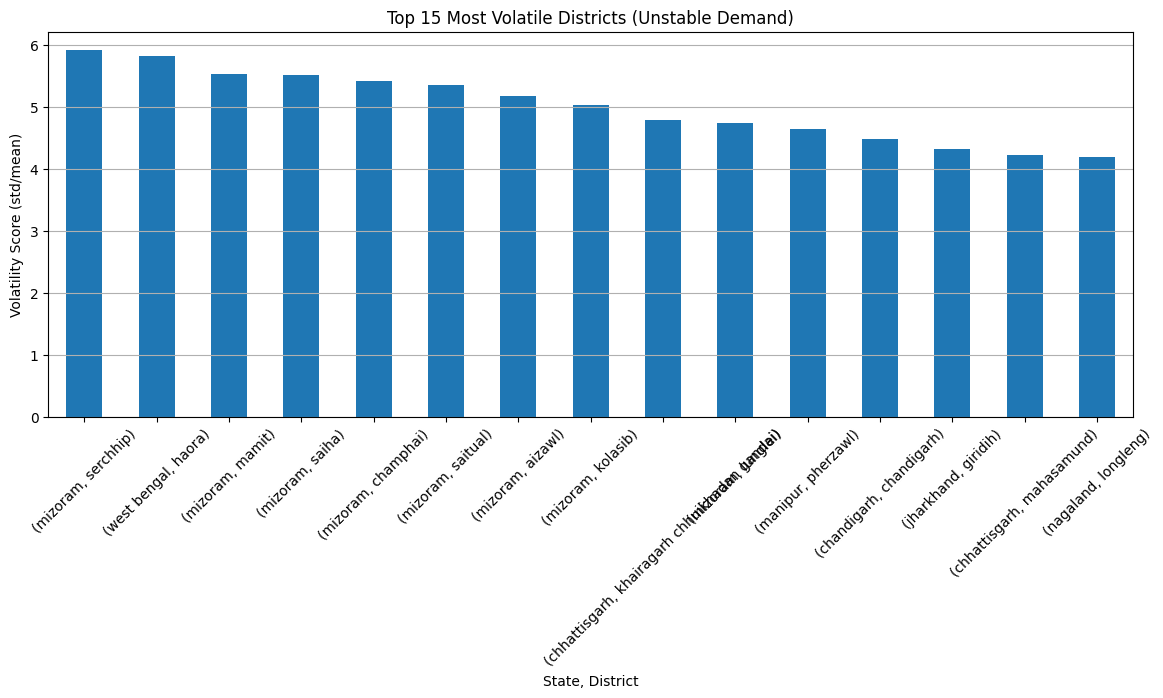

In [121]:
top_volatile.set_index(["state","district"])["volatility_score"].plot(kind="bar", figsize=(14,5))
plt.title("Top 15 Most Volatile Districts (Unstable Demand)")
plt.xlabel("State, District")
plt.ylabel("Volatility Score (std/mean)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

                 Repeat Update Burden Index: Pincodes with Frequent Aadhaar Modifications

In [122]:
pincode_updates = df.groupby("pincode")[["demo_total","bio_total","updates_total"]].sum()
pincode_updates = pincode_updates.sort_values("updates_total", ascending=False)

pincode_updates.head(20)


,demo_total,bio_total,updates_total
pincode,,,
110094,47363,66690,114053
244001,41776,60412,102188
110086,39883,56407,96290
110059,44701,49557,94258
283203,39861,40877,80738
431001,13907,62507,76414
202001,27686,47086,74772
247001,22906,48262,71168
110041,28015,40591,68606


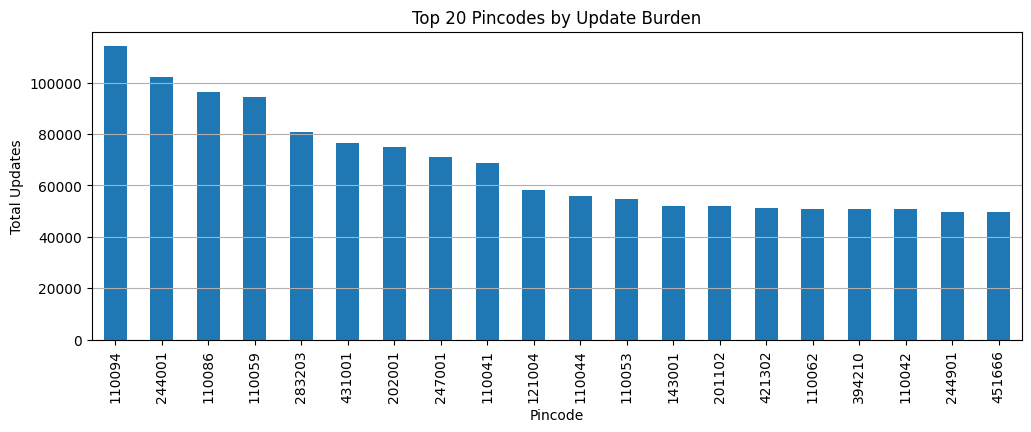

In [123]:
top20 = pincode_updates.head(20)["updates_total"]
top20.plot(kind="bar", figsize=(12,4))
plt.title("Top 20 Pincodes by Update Burden")
plt.xlabel("Pincode")
plt.ylabel("Total Updates")
plt.grid(axis="y")
plt.show()


            Biometric Dominance Hotspots: Possible Biometric Quality & Re-capture Pressure

In [124]:
df["bio_share"] = df["bio_total"] / (df["bio_total"] + df["demo_total"] + 1)

bio_hotspots = df.groupby(["state","district"])[["bio_total","demo_total"]].sum()
bio_hotspots["bio_share"] = bio_hotspots["bio_total"] / (bio_hotspots["bio_total"] + bio_hotspots["demo_total"] + 1)

bio_hotspots = bio_hotspots.sort_values("bio_share", ascending=False)
bio_hotspots.head(20)


bio_total  \
state                                    district                                
nagaland                                 longleng                         1876   
                                         kohima                          10059   
chhattisgarh                             dakshin bastar dantewada        32184   
himachal pradesh                         lahul & spiti                     691   
andaman and nicobar islands              nicobar                          1517   
mizoram                                  saitual                          3736   
dadra and nagar haveli and daman and diu dadra and nagar haveli          22707   
chhattisgarh                             dantewada                        4902   
nagaland                                 phek                             8002   
lakshadweep                              lakshadweep                      3753   
punjab                                   nawanshahr                       6935   
                                         shaheed bhagat singh nagar      22759   
maharashtra                              bid                             28717   
nagaland                                 dimapur                         18047   
karnataka                                chikmagalur                       650   
odisha                                   baudh                            3384   
andaman and nicobar islands              andamans                         2426   
punjab                                   rupnagar                        36725   
                                         sas nagarmohali                  5166   
himachal pradesh                         kinnaur                          3167   

                                                                     demo_total  \
state                                    district                                 
nagaland                                 longleng                            19   
                                         kohima                             209   
chhattisgarh                             dakshin bastar dantewada           705   
himachal pradesh                         lahul & spiti                       15   
andaman and nicobar islands              nicobar                             39   
mizoram                                  saitual                             98   
dadra and nagar haveli and daman and diu dadra and nagar haveli             614   
chhattisgarh                             dantewada                          133   
nagaland                                 phek                               228   
lakshadweep                              lakshadweep                        116   
punjab                                   nawanshahr                         217   
                                         shaheed bhagat singh nagar         720   
maharashtra                              bid                                932   
nagaland                                 dimapur                            592   
karnataka                                chikmagalur                         21   
odisha                                   baudh                              114   
andaman and nicobar islands              andamans                            89   
punjab                                   rupnagar                          1376   
                                         sas nagarmohali                    194   
himachal pradesh                         kinnaur                            125   

                                                                     bio_share  
state                                    district                               
nagaland                                 longleng                     0.989451  
                                         kohima                       0.979550  
chhattisgarh                             dakshin bastar dantewada     0.978535  
himachal pradesh                

                    Child Enrolment Priority Zones: Regions with High 0–5 Aadhaar Enrolments

In [125]:
child_zone = df.groupby(["state","district"])[["enro_age_0_5","enro_total"]].sum()
child_zone["child_share"] = child_zone["enro_age_0_5"] / (child_zone["enro_total"] + 1)

child_zone = child_zone[child_zone["enro_total"] > 1000]   # filter small values
child_zone = child_zone.sort_values("child_share", ascending=False)

child_zone.head(20)


enro_age_0_5  enro_total  child_share
state          district                                              
andhra pradesh visakhapatnam            1044        1122     0.929653
               west godavari             978        1053     0.927894
karnataka      gadag                    1251        1362     0.917828
chhattisgarh   raipur                   1353        1482     0.912340
telangana      nizamabad                1437        1580     0.908918
haryana        sonipat                  1025        1130     0.906278
               hisar                    1038        1145     0.905759
madhya pradesh seoni                    1032        1142     0.902887
andhra pradesh east godavari            1318        1460     0.902122
west bengal    purba medinipur          3397        3787     0.896779
andhra pradesh kurnool                  1655        1850     0.894111
west bengal    murshidabad              7189        8044     0.893599
tamil nadu     madurai                  1888        2114     0.892671
               tiruvannamalai           1167        1307     0.892202
chhattisgarh   baloda bazar             1047        1173     0.891823
madhya pradesh balaghat                 1273        1428     0.890833
andhra pradesh krishna                  1085        1217     0.890805
               chittoor                 1251        1405     0.889758
tamil nadu     tiruchirappalli          1701        1914     0.888251
haryana        panipat                  2729        3072     0.888057

            Adult Update Pressure Areas: High 17+ Update Demand (Migration/KYC Indicator)

In [126]:
adult_pressure = df.groupby(["state","district"])[["demo_age_17_","bio_age_17_"]].sum()
adult_pressure["adult_updates"] = adult_pressure["demo_age_17_"] + adult_pressure["bio_age_17_"]

adult_pressure = adult_pressure.sort_values("adult_updates", ascending=False)
adult_pressure.head(20)

demo_age_17_  bio_age_17_  adult_updates
state       district                                                   
maharashtra thane                     89091       265608         354699
            pune                      79939       259500         339439
            nashik                    36439       279828         316267
delhi       north west delhi         102397       156429         258826
rajasthan   jaipur                    72306       161462         233768
maharashtra jalgaon                   18894       209367         228261
gujarat     surat                    103262       123145         226407
maharashtra mumbai suburban           42162       175709         217871
            nagpur                    25342       188966         214308
gujarat     ahmedabad                 33639       164647         198286
maharashtra yavatmal                  22874       175348         198222
            amravati                  11254       185535         196789
delhi       west delhi                90520       105619         196139
maharashtra nanded                    21556       169054         190610
west bengal north 24 parganas         68813       121513         190326
            south 24 parganas         80559       104864         185423
maharashtra aurangabad                24364       158444         182808
west bengal murshidabad               77029       103126         180155
maharashtra solapur                   29581       149684         179265
            ahmadnagar                25434       142704         168138

                        Weekend Load Analysis: Saturday/Sunday Aadhaar Demand Surge

In [127]:
weekend_df = df[df["weekday"].isin(["Saturday","Sunday"])]

weekend_state = weekend_df.groupby("state")["total_activity"].sum().sort_values(ascending=False).head(15)
weekend_state


state
uttar pradesh     3439898
maharashtra       2608336
madhya pradesh    2210300
bihar             1868045
andhra pradesh    1464063
tamil nadu        1419590
rajasthan         1203042
gujarat           1156883
karnataka          930183
west bengal        910277
chhattisgarh       830274
odisha             759045
jharkhand          756233
delhi              715033
haryana            602227
Name: total_activity, dtype: int64

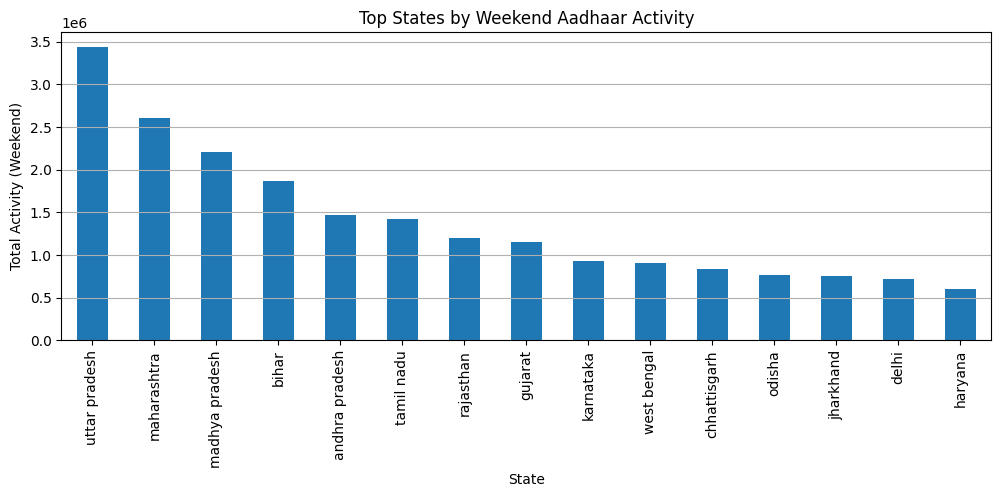

In [128]:
weekend_state.plot(kind="bar", figsize=(12,4))
plt.title("Top States by Weekend Aadhaar Activity")
plt.xlabel("State")
plt.ylabel("Total Activity (Weekend)")
plt.grid(axis="y")
plt.show()


             Within-State Demand Inequality: Few Districts Handling Most Activity

In [129]:
state_district = df.groupby(["state","district"])["total_activity"].sum().reset_index()

result = []

for s in state_district["state"].unique():
    temp = state_district[state_district["state"] == s].sort_values("total_activity", ascending=False)
    total = temp["total_activity"].sum()
    top5_share = temp.head(5)["total_activity"].sum() / (total + 1e-9)
    result.append([s, top5_share])

inequality = pd.DataFrame(result, columns=["state","top5_district_share"])
inequality = inequality.sort_values("top5_district_share", ascending=False)

inequality.head(15)


,state,top5_district_share
5,chandigarh,1.000000
26,puducherry,1.000000
9,goa,1.000000
7,dadra and nagar haveli and daman and diu,1.000000
0,andaman and nicobar islands,1.000000
17,ladakh,1.000000
18,lakshadweep,1.000000
29,sikkim,0.959971
32,tripura,0.845598
21,manipur,0.775294


                Peak Demand Calendar: Best Month to Scale Aadhaar Resources in Each State

In [130]:
state_month = df.groupby(["state","month"])["total_activity"].sum().reset_index()

peak_month = state_month.loc[state_month.groupby("state")["total_activity"].idxmax()]
peak_month = peak_month.sort_values("total_activity", ascending=False)

peak_month.head(20)


C:\Users\arsha\AppData\Local\Temp\ipykernel_6968\978695349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_month = df.groupby(["state","month"])["total_activity"].sum().reset_index()


,state,month,total_activity
396,uttar pradesh,January,7391974
240,maharashtra,January,5680900
228,madhya pradesh,January,4985212
48,bihar,January,3923944
360,tamil nadu,January,3088989
336,rajasthan,January,2909077
12,andhra pradesh,January,2839115
120,gujarat,January,2712862
180,karnataka,January,2038609
420,west bengal,January,2004380
